# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#pip install citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_range = (-90, 90)
lng_range = (-180, 180)
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#to get a combined set
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)
#print(cities)
    

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url=api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#url={"cod":401, "message": "Invalid API key. Please see http://openweathermap.org/faq#error401 for more info."}
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="+"perth"
cityweather=requests.get(url).json()
print(cityweather)



{'coord': {'lon': 115.8333, 'lat': -31.9333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.03, 'feels_like': 67.78, 'temp_min': 66.33, 'temp_max': 71.02, 'pressure': 1015, 'humidity': 46}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1636170072, 'sys': {'type': 2, 'id': 63154, 'country': 'AU', 'sunrise': 1636146907, 'sunset': 1636195527}, 'timezone': 28800, 'id': 2063523, 'name': 'Perth', 'cod': 200}


In [4]:
#Perform a weather check on each city using a series of successive API calls.

# Import API key
from api_keys import weather_api_key

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": weather_api_key}

# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [5]:
#Include a print log of each city as it'sbeing processed (with the city number and city name).

count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
city_data = []
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        #print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="+city1
        city_weather=requests.get(url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        #city_stats = owm.get_current(city, **settings)
        #WeatherPy_df.set_value(index, "City", city_stats["name"])
        #WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        #WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        #WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        #WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        #WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        #WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        #WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        #WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')


Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | ushuaia
Processing Record 2 of Set 0 | bengkulu
Processing Record 3 of Set 0 | manacapuru
Processing Record 4 of Set 0 | hermanus
Processing Record 5 of Set 0 | mys shmidta
'coord'
Processing Record 6 of Set 0 | ribeira grande
Processing Record 7 of Set 0 | punta arenas
Processing Record 8 of Set 0 | nikolskoye
Processing Record 9 of Set 0 | rocha
Processing Record 10 of Set 0 | airai
Processing Record 11 of Set 0 | gornopravdinsk
Processing Record 12 of Set 0 | hanzhong
Processing Record 13 of Set 0 | vaini
Processing Record 14 of Set 0 | rikitea
Processing Record 15 of Set 0 | lakes entrance
Processing Record 16 of Set 0 | taolanaro
'coord'
Processing Record 17 of Set 0 | albany
Processing Record 18 of Set 0 | sabha
Processing Record 19 of Set 0 | diamantino
Processing Record 20 of Set 0 | georgetown
Processing Record 21 of Set 0 | kasama
Processing Record 22 of Set 0 | sonoita
Processing Record 23 of 

Processing Record 45 of Set 3 | najran
Processing Record 46 of Set 3 | sorrento
Processing Record 47 of Set 3 | eaglesfield
Processing Record 48 of Set 3 | pandamatenga
Processing Record 49 of Set 3 | cherskiy
Processing Record 50 of Set 3 | domoni
Processing Record 1 of Set 4 | tezu
Processing Record 2 of Set 4 | umea
Processing Record 3 of Set 4 | saint-pierre
Processing Record 4 of Set 4 | novoilinsk
Processing Record 5 of Set 4 | kangaatsiaq
Processing Record 6 of Set 4 | nantucket
Processing Record 7 of Set 4 | hithadhoo
Processing Record 8 of Set 4 | ancud
Processing Record 9 of Set 4 | tilichiki
Processing Record 10 of Set 4 | saldanha
Processing Record 11 of Set 4 | cidreira
Processing Record 12 of Set 4 | constitucion
Processing Record 13 of Set 4 | namatanai
Processing Record 14 of Set 4 | ningan
'coord'
Processing Record 15 of Set 4 | cayenne
Processing Record 16 of Set 4 | veraval
Processing Record 17 of Set 4 | mundo nuevo
Processing Record 18 of Set 4 | boyuibe
Processing

ValueError: sleep length must be non-negative

In [6]:
print(city_data)

[{'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 51.46, 'Humidity': 50, 'Cloudiness': 40, 'Wind Speed': 11.5, 'Country': 'AR', 'Date': 1636170358}, {'City': 'bengkulu', 'Lat': -3.8004, 'Lng': 102.2655, 'Max Temp': 79.27, 'Humidity': 80, 'Cloudiness': 100, 'Wind Speed': 7.78, 'Country': 'ID', 'Date': 1636170351}, {'City': 'manacapuru', 'Lat': -3.2997, 'Lng': -60.6206, 'Max Temp': 79.38, 'Humidity': 75, 'Cloudiness': 41, 'Wind Speed': 1.99, 'Country': 'BR', 'Date': 1636170622}, {'City': 'hermanus', 'Lat': -34.4187, 'Lng': 19.2345, 'Max Temp': 55.9, 'Humidity': 76, 'Cloudiness': 17, 'Wind Speed': 4.68, 'Country': 'ZA', 'Date': 1636170623}, {'City': 'ribeira grande', 'Lat': 38.5167, 'Lng': -28.7, 'Max Temp': 69.69, 'Humidity': 90, 'Cloudiness': 100, 'Wind Speed': 24.54, 'Country': 'PT', 'Date': 1636170625}, {'City': 'punta arenas', 'Lat': -53.15, 'Lng': -70.9167, 'Max Temp': 48.31, 'Humidity': 71, 'Cloudiness': 75, 'Wind Speed': 10.36, 'Country': 'CL', 'Date': 1636170445}, {'Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Display the count of cities with weather data
city_data_pd=pd.DataFrame(city_data)
city_data_pd.count()

City          328
Lat           328
Lng           328
Max Temp      328
Humidity      328
Cloudiness    328
Wind Speed    328
Country       328
Date          328
dtype: int64

In [9]:
# save to csv file
city_data_pd.to_csv("output_data_file", encoding='utf-8', index=False)

# Display the city weather data frame
city_data_pd.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,51.46,50,40,11.50,AR,1636170358
1,bengkulu,-3.8004,102.2655,79.27,80,100,7.78,ID,1636170351
2,manacapuru,-3.2997,-60.6206,79.38,75,41,1.99,BR,1636170622
3,hermanus,-34.4187,19.2345,55.90,76,17,4.68,ZA,1636170623
4,ribeira grande,38.5167,-28.7000,69.69,90,100,24.54,PT,1636170625
5,punta arenas,-53.1500,-70.9167,48.31,71,75,10.36,CL,1636170445
6,nikolskoye,59.7035,30.7861,43.88,85,100,10.56,RU,1636170627
7,rocha,-34.4833,-54.3333,58.05,77,100,14.76,UY,1636170628
8,airai,-8.9266,125.4092,80.10,45,72,3.00,TL,1636170630
9,gornopravdinsk,60.0500,69.9000,33.62,98,100,8.55,RU,1636170630


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

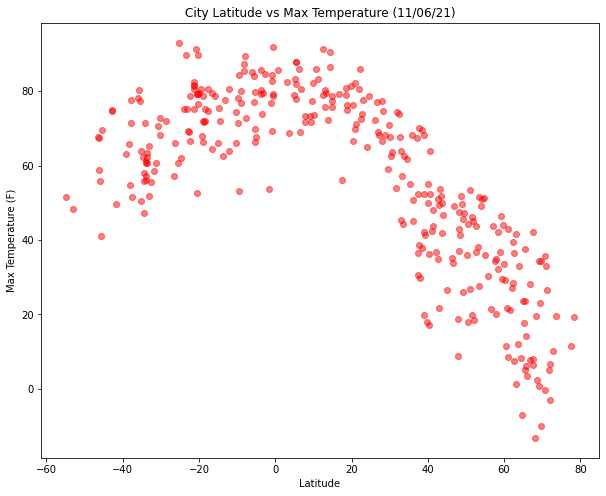

In [10]:
plt.figure(figsize=(10,8))
#sns.set()
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({time.strftime("%x")})')
plt.savefig("LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

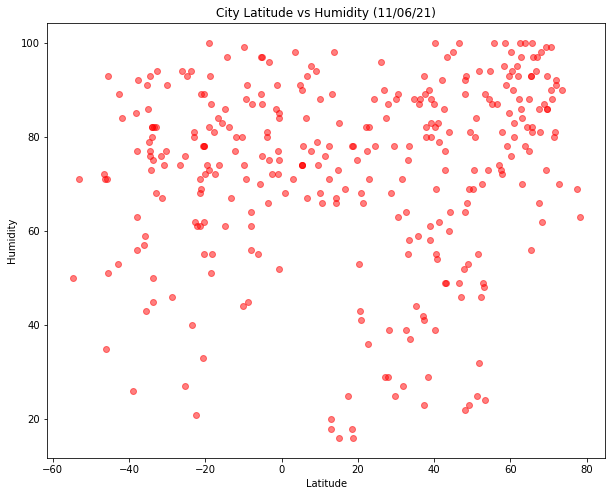

In [11]:
plt.figure(figsize=(10,8))
#sns.set()
plt.scatter(city_data_pd["Lat"], city_data_pd["Humidity"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity ({time.strftime("%x")})')
plt.savefig("LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

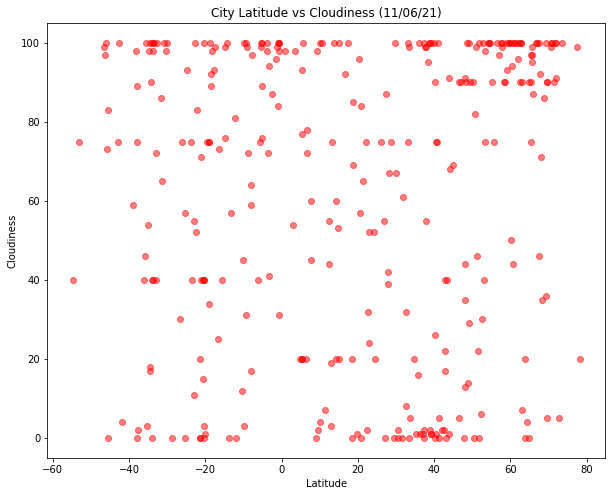

In [12]:
plt.figure(figsize=(10,8))
#sns.set()
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs Cloudiness ({time.strftime("%x")})')
plt.savefig("LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

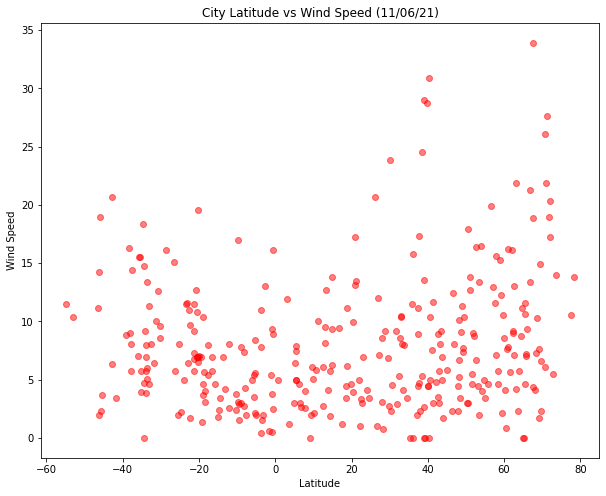

In [13]:
plt.figure(figsize=(10,8))
#sns.set()
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed ({time.strftime("%x")})')
plt.savefig("LatVsWind Speed.png")
plt.show()


## Linear Regression

In [14]:
#nothern = cities.loc[cities["Lat"] >= 0.0]




#southern = cities.loc[cities["Lat"] <

nothern = city_data_pd.loc[(city_data_pd["Lat"] >= 0.0)]
#nothern.reset_index(inplace=True)
southern = city_data_pd.loc[(city_data_pd["Lat"] <0)]

In [16]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8777394677494961


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig5.png'

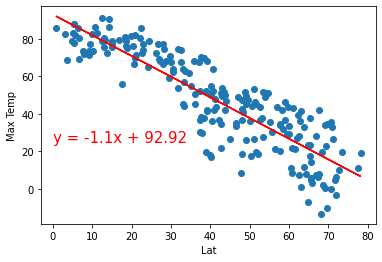

In [17]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5584853058188655


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig6.png'

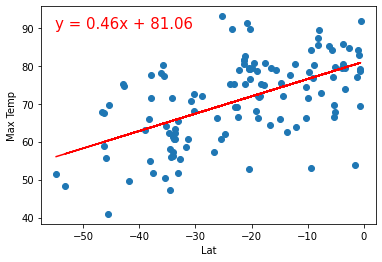

In [18]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2520709681759439


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig7.png'

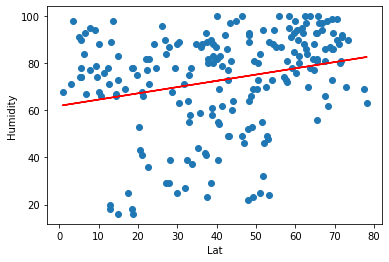

In [19]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18434006712817458


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig8.png'

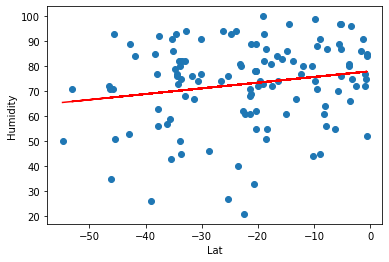

In [20]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25634075936544826


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig9.png'

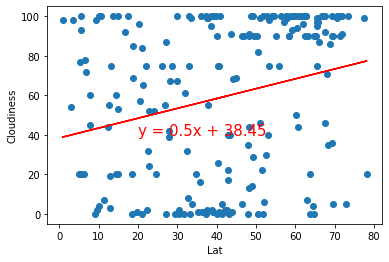

In [21]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11889025711208018


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig10.png'

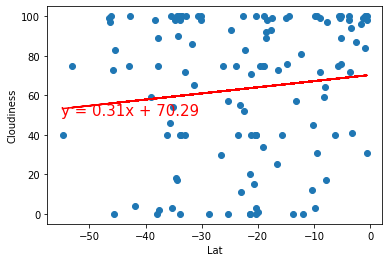

In [22]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.27987499919247205


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig11.png'

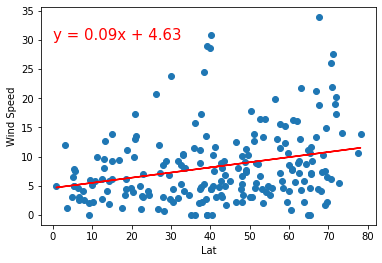

In [23]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.35399633122182955


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig12.png'

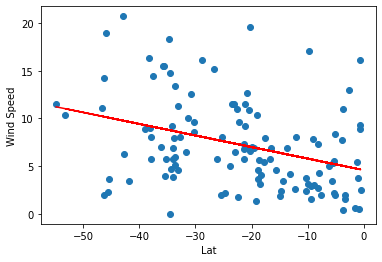

In [24]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)